# Sentiment analysis and visualization of the tweets collected 

## Setup

In [78]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use("ggplot")

In [5]:
# Reading the data
df = pd.read_csv("../twitter scrapping using snscrape/scrappedtweets.csv")

In [6]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-04-13 02:56:08+00:00,1646346501101174786,"#Ukraine: In the video, a Ukrainian soldier wi...",WeaponsWarfare
1,2023-04-12 10:38:53+00:00,1646100569696632833,#Ukraine: A very rare video of a Ukrainian BSE...,WeaponsWarfare
2,2023-04-12 02:50:37+00:00,1645982725583585280,#Ukraine: Very rare video - American🇺🇲 BATT UM...,WeaponsWarfare
3,2023-04-07 18:01:33+00:00,1644400032362246145,"⚡️📢 Romanian media reports, that: ""Armenia ign...",ScourgeOfTengri
4,2023-04-07 07:36:00+00:00,1644242607021740032,The Ukrainian counter-offensive is likely to b...,ukraine_world


## Data Preprocessing

### Cleaning the tweets

In [10]:
# Function to clean the tweets
def cleanTweets(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) # Remove mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtags
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove retweets
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)  # Remove links
    
    return tweet

df["Text"] = df["Text"].apply(cleanTweets)

In [11]:
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-04-13 02:56:08+00:00,1646346501101174786,"Ukraine: In the video, a Ukrainian soldier wit...",WeaponsWarfare
1,2023-04-12 10:38:53+00:00,1646100569696632833,Ukraine: A very rare video of a Ukrainian BSEM...,WeaponsWarfare
2,2023-04-12 02:50:37+00:00,1645982725583585280,Ukraine: Very rare video - American🇺🇲 BATT UMG...,WeaponsWarfare
3,2023-04-07 18:01:33+00:00,1644400032362246145,"⚡️📢 Romanian media reports, that: ""Armenia ign...",ScourgeOfTengri
4,2023-04-07 07:36:00+00:00,1644242607021740032,The Ukrainian counter-offensive is likely to b...,ukraine_world


### Subjectivity

In [12]:
def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

### Polarity

In [13]:
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

### Add the Subjectivity and Polarity columns

In [14]:
df["Subjectivity"] = df["Text"].apply(getSubjectivity)
df["Polarity"] = df["Text"].apply(getPolarity)

df

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity
0,2023-04-13 02:56:08+00:00,1646346501101174786,"Ukraine: In the video, a Ukrainian soldier wit...",WeaponsWarfare,0.321429,0.166667
1,2023-04-12 10:38:53+00:00,1646100569696632833,Ukraine: A very rare video of a Ukrainian BSEM...,WeaponsWarfare,1.000000,0.390000
2,2023-04-12 02:50:37+00:00,1645982725583585280,Ukraine: Very rare video - American🇺🇲 BATT UMG...,WeaponsWarfare,0.500000,0.195000
3,2023-04-07 18:01:33+00:00,1644400032362246145,"⚡️📢 Romanian media reports, that: ""Armenia ign...",ScourgeOfTengri,0.050000,-0.050000
4,2023-04-07 07:36:00+00:00,1644242607021740032,The Ukrainian counter-offensive is likely to b...,ukraine_world,1.000000,0.000000
...,...,...,...,...,...,...
5248,2023-03-21 13:14:22+00:00,1638167165282004999,"Today, my performance of this song was feature...",patrickdextervc,0.483333,0.466667
5249,2023-03-21 12:45:48+00:00,1638159974508421122,The illegal and unprovoked invasion of Ukraine...,DefenceHQ,0.633333,0.166667
5250,2023-03-21 11:28:53+00:00,1638140618235838465,Norway extends agreement on medical evacuation...,NorwayEU,0.250000,0.000000
5251,2023-03-21 10:31:12+00:00,1638126103523893251,Today we disbursed €1.5 billion of the Macro-F...,EU_Commission,0.200000,-0.025000


### Plotting Word Cloud

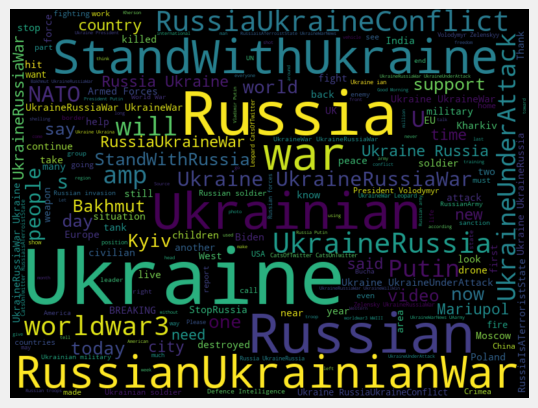

In [54]:
allWords = ' '.join( [twts for twts in df["Text"]] )
wordCloud = WordCloud(width=800, height=600, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
# Save word cloud
wordCloud.to_file("word-cloud.png")

### Computing the sentiment of the tweets

In [37]:
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [38]:
# Applying getAnalysis function
df["Analysis"] = df["Polarity"].apply(getAnalysis)
df

,Datetime,Tweet Id,Text,Username,Subjectivity,Polarity,Analysis
0,2023-04-13 02:56:08+00:00,1646346501101174786,"Ukraine: In the video, a Ukrainian soldier wit...",WeaponsWarfare,0.321429,0.166667,Positive
1,2023-04-12 10:38:53+00:00,1646100569696632833,Ukraine: A very rare video of a Ukrainian BSEM...,WeaponsWarfare,1.000000,0.390000,Positive
2,2023-04-12 02:50:37+00:00,1645982725583585280,Ukraine: Very rare video - American🇺🇲 BATT UMG...,WeaponsWarfare,0.500000,0.195000,Positive
3,2023-04-07 18:01:33+00:00,1644400032362246145,"⚡️📢 Romanian media reports, that: ""Armenia ign...",ScourgeOfTengri,0.050000,-0.050000,Negative
4,2023-04-07 07:36:00+00:00,1644242607021740032,The Ukrainian counter-offensive is likely to b...,ukraine_world,1.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
5248,2023-03-21 13:14:22+00:00,1638167165282004999,"Today, my performance of this song was feature...",patrickdextervc,0.483333,0.466667,Positive
5249,2023-03-21 12:45:48+00:00,1638159974508421122,The illegal and unprovoked invasion of Ukraine...,DefenceHQ,0.633333,0.166667,Positive
5250,2023-03-21 11:28:53+00:00,1638140618235838465,Norway extends agreement on medical evacuation...,NorwayEU,0.250000,0.000000,Neutral
5251,2023-03-21 10:31:12+00:00,1638126103523893251,Today we disbursed €1.5 billion of the Macro-F...,EU_Commission,0.200000,-0.025000,Negative


### Get the percentages of positive, negative and neutral tweets

In [45]:
# Positive tweets
ptweets = df[df.Analysis == "Positive"]
ptweets = ptweets["Text"]
positive_percentage = round((ptweets.shape[0]/df.shape[0] * 100), 2)
print(f'Percentage of positive tweets: {positive_percentage}')

Percentage of positive tweets: 38.51


In [46]:
# Negative tweets
ntweets = df[df.Analysis == "Negative"]
ntweets = ntweets["Text"]
negetive_percentage = round((ntweets.shape[0]/df.shape[0] * 100), 2)
print(f'Percentage of negative tweets: {negetive_percentage}')

Percentage of negative tweets: 22.35


In [47]:
# Neutral tweets
neutweets = df[df.Analysis == "Neutral"]
neutweets = neutweets["Text"]
neutral_percentage = round((neutweets.shape[0]/df.shape[0] * 100), 2)
print(f'Percentage of neutral tweets: {neutral_percentage}')

Percentage of neutral tweets: 39.14


## Visualization

### Visualizing the value counts

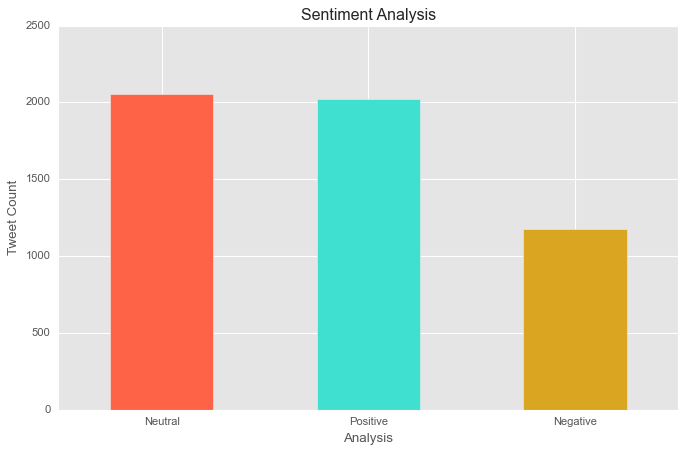

In [85]:
# Bar graph

plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
df["Analysis"].value_counts().plot(kind="bar", figsize = (10, 6), color=["tomato", "turquoise", "goldenrod"])
plt.xticks(rotation=0)
plt.show();

### Visualizing the subjectivity and polarity

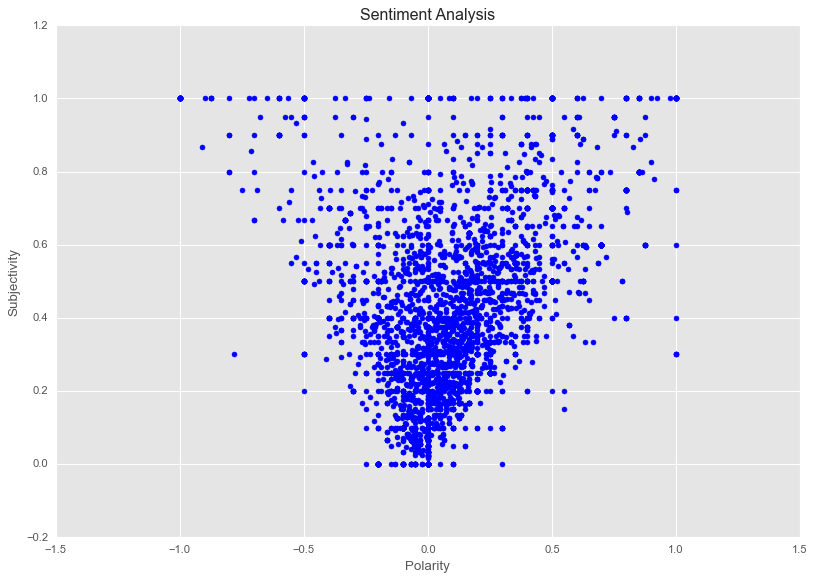

In [89]:
# Scatter plot
plt.figure(figsize=(12, 8))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")
    
plt.title("Sentiment Analysis") 
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show();

## Conclusion

By processing and analyzing the data, the following were found:
1. Word Cloud generated and saved.
2. Percentage of positive tweets: 38.51.
3. Percentage of negative tweets: 22.35.
4. Percentage of neutral tweets: 39.14.